In [2]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('coches-de-segunda-mano-sample.csv')

# Look at the variables names
print(df.columns)

# Check the data types
print(df.dtypes)

# Summary Statistics
print(df.describe)

df.head()

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')
url                 object
company             object
make                object
model               object
version             object
price                int64
price_financed     float64
fuel                object
year               float64
kms                  int64
power              float64
doors                int64
shift               object
color               object
photos               int64
is_professional       bool
dealer              object
province            object
country             object
publish_date        object
insert_date         object
dtype: object
<bound method NDFrame.describe of                                     url                           company  \
0      e158ae0ca53119ca199c28c36

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


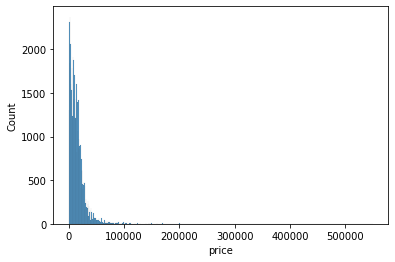

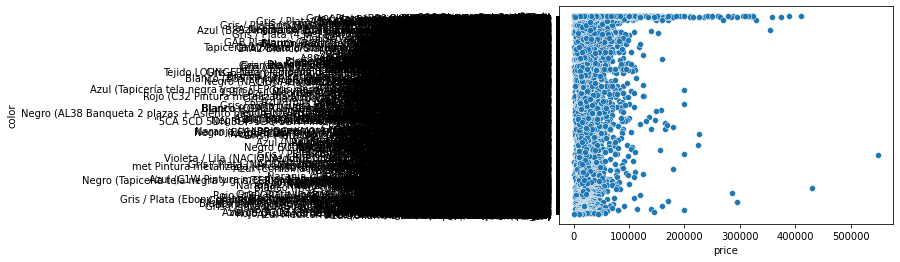

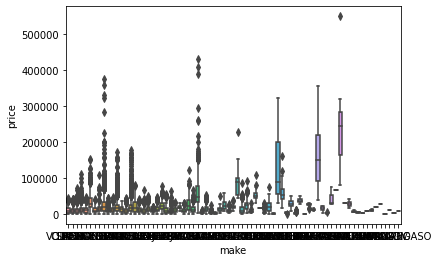

In [4]:
# Histogram  of prices 
sns.histplot(df['price'])
plt.show()

# Scatter plot of price vs. km
sns.scatterplot(x='price', y='color', data=df)
plt.show()

# Box plot of price by make
sns.boxplot(x="make", y="price", data=df)
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())

# Delete column price_financed (not useful and lots of na)
df.drop(['price_financed'], axis = 1, inplace = True)

# Drop rows with missing values
cars = df.dropna()

# Show new dataframe
cars.shape[0]

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64


41245

In [ ]:
# Calculate the average price by make
avg_price_by_make = cars.groupby("make")["price"].mean()
print(avg_price_by_make)

# Find the cars with high km and low price
high_kms_low_price =  cars[(cars['kms'] > 100000) & (cars['price'] < 5000)]
print(high_kms_low_price)

In [ ]:
# Visualize the relationships between the variables
sns.pairplot(cars)
plt.show()

# Calculate Pearson's correlation coefficient
corr = cars.corr()
print(corr)

In [39]:
# Build a linear regression model to predict

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the variables to use in the model
X = cars[["kms", "year","power","doors"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 5115.6908857134595
Root Mean Squared Error: 9538.031168421545
Mean Absolute Percentage Error: 59.3063291412337


In [29]:
from sklearn.preprocessing import LabelEncoder 

# Create a LabelEncoder object
make_le = LabelEncoder()
model_le = LabelEncoder()
version_le = LabelEncoder()
fuel_le = LabelEncoder()
shift_le = LabelEncoder()
color_le = LabelEncoder()

# Fit the encoder to the "make" column
make_le.fit(cars["make"])
model_le.fit(cars["model"])
version_le.fit(cars["version"])
fuel_le.fit(cars["fuel"])
shift_le.fit(cars["shift"])
color_le.fit(cars["color"])

# Transform the "make" column into numeric values
make_encoded = make_le.transform(cars["make"])
model_encoded = model_le.transform(cars["model"])
version_encoded = version_le.transform(cars["version"])
fuel_encoded = fuel_le.transform(cars["fuel"])
shift_encoded = shift_le.transform(cars["shift"])
color_encoded = color_le.transform(cars["color"]) 

# Add the encoded values to the dataset
cars["make_encoded"] = make_encoded
cars["model_encoded"] = model_encoded
cars["version_encoded"] = version_encoded
cars["fuel_encoded"] = fuel_encoded
cars["shift_encoded"] = shift_encoded

In [27]:
# Import the necessary libraries and packages

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Select the variables to use in the model
X = cars[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded", "kms", "year", "power", "doors", "shift_encoded", "color_encoded"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Error: 2883.247211895911
Root Mean Squared Error: 7785.582588461631
Mean Absolute Percentage Error: 21.850451119194382


In [28]:
# Import the necessary libraries and packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

cars["color_encoded"] = color_encoded 

# Select the variables to use in the model
X = cars[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded", "kms", "year", "power", "doors", "shift_encoded", "color_encoded"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Error: 2100.7485896356843
Root Mean Squared Error: 5360.088757686273
Mean Absolute Percentage Error: 16.54736489756563
